In [ ]:
import re
from pathlib import Path
from pprint import pp

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    PredictionErrorDisplay,
    mean_absolute_percentage_error,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from P03_run_diff_sigma.T00_lib.classes_ml import MyUtil


In [37]:
SAVE_DATA = False
MAKE_ONE_HOT = False

In [38]:
BASE_DIR = Path.cwd()  # Current directory of the running file
DATA_DIR = BASE_DIR.parent.parent / "P03_run_diff_sigma"/ "T02_combine_features"
CURRENT_DIR = BASE_DIR

dt = MyUtil.get_dt()
print(f"Current Directory: {CURRENT_DIR}")
print(f"Current Date and Time: {dt}")

# Load data
df = pd.read_excel(DATA_DIR / "S02_data_combined_loc.xlsx")
print(df.shape)
df

Current Directory: c:\Users\admin\Coding\research\weld-ml\src\P06_no_af\T01_ml_trial
Current Date and Time: 2026-01-23_11-55
(378, 180)


,sample_no,R,W,D,position,location,fz_location,"dwell_Fz__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""max""",dwell_Fz__mean_change,"dwell_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.0",...,"weld_Fz__fft_coefficient__attr_""angle""__coeff_26","weld_Fz__fft_coefficient__attr_""angle""__coeff_86","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.2","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.2",weld_Fz__ratio_beyond_r_sigma__r_2.5,weld_Fz__binned_entropy__max_bins_10,weld_Fz__kurtosis,stress_value_5052,stress_value_6061,stress_value_center
0,1,1400,60,10,0.153846,1,1.244326,-0.015598,-0.000466,-0.000466,...,-59.307464,-126.394608,0.000592,0.000077,0.011999,1.996898,0.031761,28.0,51.0,12.0
1,2,1400,60,15,0.153846,1,1.203367,-0.001207,-0.000060,-0.000060,...,-67.104324,-83.441169,0.001515,0.000074,0.026536,1.433742,2.139541,14.0,-21.0,17.0
2,3,1400,60,20,0.153846,1,1.444542,-0.004830,-0.000198,-0.000198,...,-73.946166,-100.226178,0.002915,0.000764,0.046766,1.651073,1.957977,10.0,35.0,12.0
3,4,1400,70,10,0.153846,1,1.601667,-0.012681,-0.000459,-0.000459,...,-109.557287,-92.120362,-0.002131,-0.000669,0.032843,1.331185,3.615244,10.0,-10.0,20.0
4,5,1400,70,15,0.153846,1,1.095031,-0.028589,-0.000819,-0.000819,...,142.508379,101.664911,0.005496,0.000705,0.017408,1.739714,-0.003368,6.0,41.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,50,1600,70,15,0.846154,7,1.905742,-0.025181,-0.000835,-0.000835,...,100.417769,70.734310,-0.000276,0.000027,0.012383,2.073254,-0.284814,4.0,-23.0,2.0
374,51,1600,70,20,0.846154,7,1.669120,-0.019329,-0.000656,-0.000656,...,77.002325,105.356086,0.002244,0.000891,0.000090,2.110911,-0.807980,0.0,-1.0,2.0
375,52,1600,80,10,0.846154,7,1.671576,-0.034536,-0.000915,-0.000915,...,-114.510109,160.581335,0.002110,0.000548,0.011999,1.947229,-0.492903,-2.0,-41.0,5.0
376,53,1600,80,15,0.846154,7,1.686495,-0.060666,-0.001356,-0.001356,...,49.909992,-131.625465,0.003661,0.001454,0.042150,1.607697,1.674617,10.0,-90.0,1.0


In [39]:
colsY = [c for c in df.columns if re.search(r"stress_value", c)]
print(colsY)
colsX = [c for c in df.columns if c not in colsY]
colsX = [c for c in colsX if c in ["sample_no", "R", "W", "D", "position", "location"]]
print(colsX)

['stress_value_5052', 'stress_value_6061', 'stress_value_center']
['sample_no', 'R', 'W', 'D', 'position', 'location']


In [40]:
dfY = df[colsY]
dfX_all = df[colsX]
print(dfX_all.shape)
print(dfY.shape)

(378, 6)
(378, 3)


In [41]:
if MAKE_ONE_HOT:
    dft1 = pd.get_dummies(
        dfX_all, columns=["location", "R", "W", "D"], drop_first=False, dtype=int
    )
    dfX = dft1.drop(columns=["sample_no"])
else:
    dfX = dfX_all.drop(columns=["sample_no", "location"])
dfX

,R,W,D,position
0,1400,60,10,0.153846
1,1400,60,15,0.153846
2,1400,60,20,0.153846
3,1400,70,10,0.153846
4,1400,70,15,0.153846
...,...,...,...,...
373,1600,70,15,0.846154
374,1600,70,20,0.846154
375,1600,80,10,0.846154
376,1600,80,15,0.846154


In [42]:
# Extract features and targets
_X = dfX.values
_Y = dfY.values

print(_X.shape)
print(_Y.shape)

(378, 4)
(378, 3)


In [43]:
_X_train, _X_test, _Y_train, _Y_test = train_test_split(
    _X, _Y, test_size=0.3, random_state=0
)
print(_X_train.shape)
print(_X_test.shape)
print(_Y_train.shape)
print(_Y_test.shape)

(264, 4)
(114, 4)
(264, 3)
(114, 3)


In [44]:
scX = StandardScaler()
X_train = scX.fit_transform(_X_train)
X_test = scX.transform(_X_test)

scY = StandardScaler()
Y_train = scY.fit_transform(_Y_train)
Y_test = scY.transform(_Y_test)

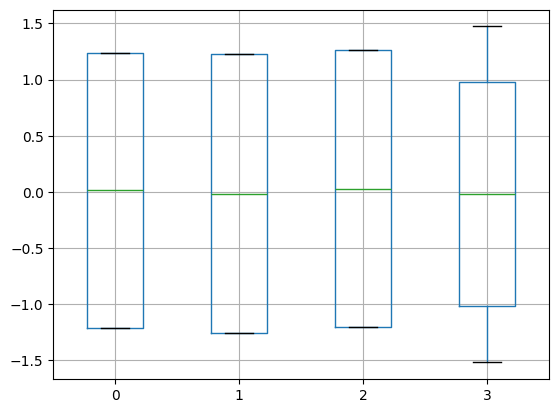

In [45]:
# _X_train.boxplot(figsize=(20,5))
pd.DataFrame(X_train).boxplot()
plt.show()

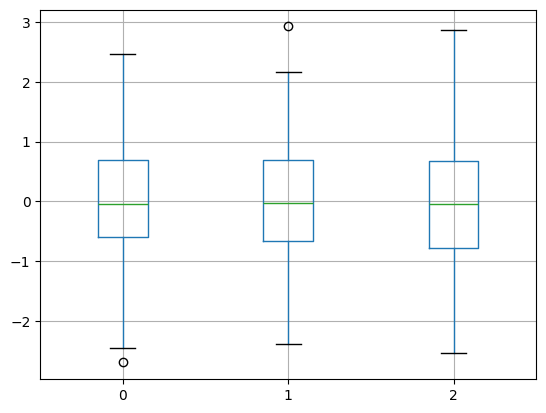

In [46]:
pd.DataFrame(Y_train).boxplot()
plt.show()

In [47]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


# model_params = {
#     "kernel": "linear",
#     "C": 2119.7634277188213,
#     # "C": 1,
#     "gamma": 0.0023517959671016664,
#     "epsilon": 0.01598581077956493,
#     "coef0": -0.6434038475318813,
#     "degree": 3,
#     "shrinking": True,
# }
# reg = MultiOutputRegressor(estimator=SVR(**model_params, verbose=True, max_iter=int(1e5)))
# reg = MultiOutputRegressor(estimator=LinearRegression())
# reg = MultiOutputRegressor(
#     estimator=RandomForestRegressor(n_estimators=200, random_state=0)
# )
reg = MultiOutputRegressor(
    estimator=GradientBoostingRegressor(n_estimators=200, random_state=0, max_depth=5)
)
# reg = MultiOutputRegressor(
#     estimator=XGBRegressor(n_estimators=200, random_state=0, max_depth=1)
# )

In [48]:
reg.fit(X_train, Y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(max_depth=5,
                                                         n_estimators=200,
                                                         random_state=0))

In [49]:
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

print(Y_train_pred.shape)
print(Y_test_pred.shape)

(264, 3)
(114, 3)


In [50]:
def eval_perf(y_true, y_pred):
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    mape = mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    return mse, mape, r2


def print_perf(data):
    for k, v in data.items():
        print(k, ":", v)


data_arr = []
for i in range(0, _Y.shape[1]):
    mse_train, mape_train, r2_train = eval_perf(
        y_true=Y_train[:, i], y_pred=Y_train_pred[:, i]
    )
    mse_test, mape_test, r2_test = eval_perf(
        y_true=Y_test[:, i], y_pred=Y_test_pred[:, i]
    )

    data = {
        "Y": f"Y-{i + 1}",
        "MSE Train": mse_train,
        "MSE Test": mse_test,
        "MAPE Train": mape_train,
        "MAPE Test": mape_test,
        "R2 Train": r2_train,
        "R2 Test": r2_test,
    }
    # print_perf(data)

    data_arr.append(data)

mse_train, mape_train, r2_train = eval_perf(y_true=Y_train, y_pred=Y_train_pred)
mse_test, mape_test, r2_test = eval_perf(y_true=Y_test, y_pred=Y_test_pred)
print_perf(data)

data = {
    "Y": "Y-All",
    "MSE Train": mse_train,
    "MSE Test": mse_test,
    "MAPE Train": mape_train,
    "MAPE Test": mape_test,
    "R2 Train": r2_train,
    "R2 Test": r2_test,
}
data_arr.append(data)
# print_perf(data)

df_eval = pd.DataFrame.from_dict(data_arr)
display(df_eval)

if SAVE_DATA:
    filename = f"eval_{dt}.xlsx"
    df_eval.to_excel(filename, index=False)

Y : Y-3
MSE Train : 0.26089635138999245
MSE Test : 1.2873212583447669
MAPE Train : 0.8716171734002501
MAPE Test : 2.7286017428160254
R2 Train : 0.7391036486100073
R2 Test : -0.36650149295747436


,Y,MSE Train,MSE Test,MAPE Train,MAPE Test,R2 Train,R2 Test
0,Y-1,0.387092,1.197468,1.400817,2.204064,0.612908,-0.502909
1,Y-2,0.400079,1.503679,1.098836,15.333693,0.599921,-0.441655
2,Y-3,0.260896,1.287321,0.871617,2.728602,0.739104,-0.366501
3,Y-All,0.349356,1.329490,1.123757,6.755453,0.650644,-0.437022


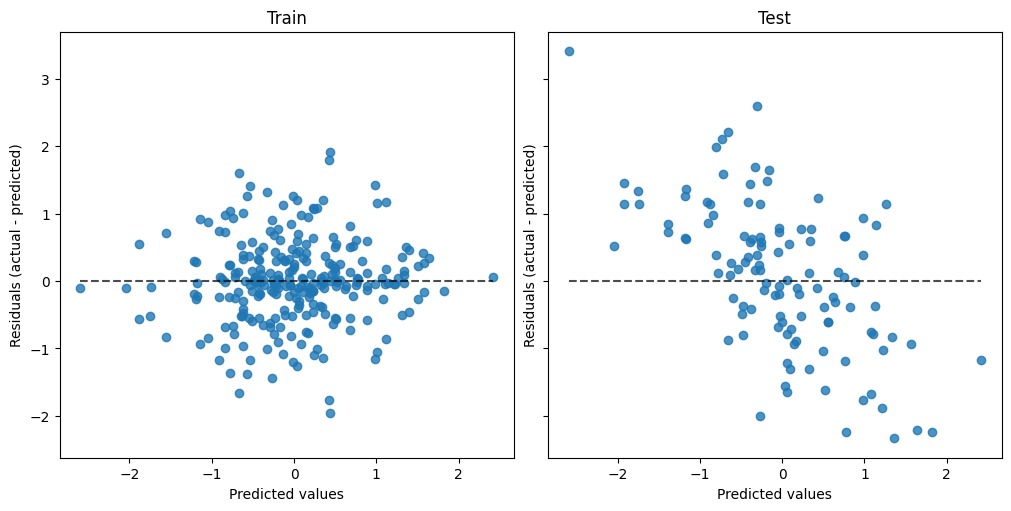

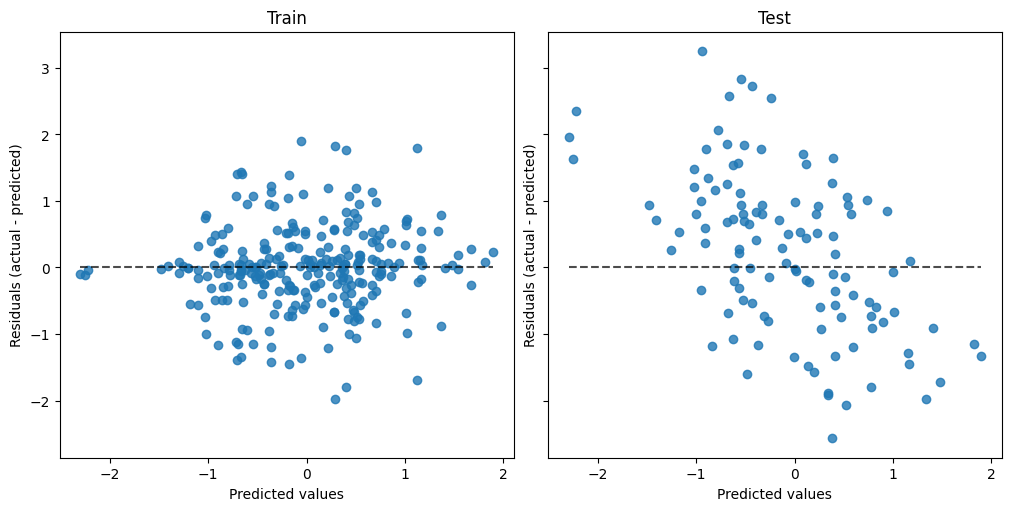

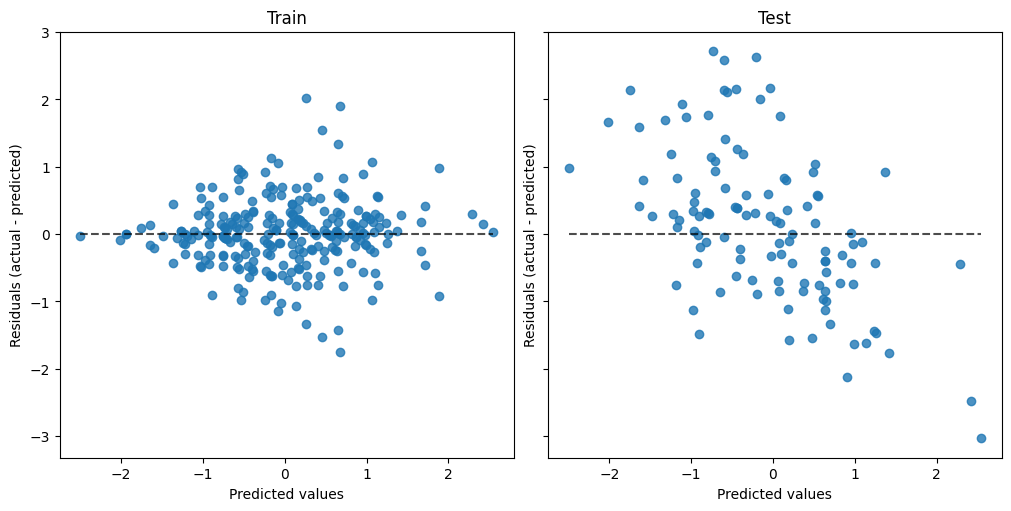

In [51]:
for i in range(0, _Y.shape[1]):
    fig, axes = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(10, 5),
        constrained_layout=True,
        sharex=True,
        sharey=True,
    )

    display_train = PredictionErrorDisplay(
        y_true=Y_train[:, i], y_pred=Y_train_pred[:, i]
    )
    display_train.plot(ax=axes[0])
    axes[0].set_title("Train")

    display_train = PredictionErrorDisplay(
        y_true=Y_test[:, i], y_pred=Y_test_pred[:, i]
    )
    display_train.plot(ax=axes[1])
    axes[1].set_title("Test")

    if SAVE_DATA:
        filename = f"res_plot_{dt}_{i}.png"
        fig.savefig(filename, dpi=300)

    plt.show()